In [1]:
# Magic line to force reload all modules when this cell is run multiple times
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, os.path.expanduser("~/Developer/interpretDL/Pipeline"))

In [2]:
import numpy as np
import pandas as pd
# import umap

from datetime import datetime
# from ClusterPipeline import ClusterPipeline
from helper import split_valid, plot_confusion_matrix, plot_history
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 42
np.random.seed(seed=RANDOM_STATE) 

In [4]:
fname = "gs25_nodes.csv"
raw_data = pd.read_csv(fname, index_col=0)
raw_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_class_weight,param_epochs,param_nodes,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.132002,0.089664,0.045618,0.011220,25,[1.26153846 0.82828283],100,"(25, 25)","{'batch_size': 25, 'class_weight': array([1.26...",0.352941,...,0.529412,0.3125,0.6250,0.3750,0.3125,0.4375,0.3750,0.469512,0.140895,1633
1,1.050926,0.035654,0.032961,0.001632,25,[1.26153846 0.82828283],100,"(50, 25)","{'batch_size': 25, 'class_weight': array([1.26...",0.470588,...,0.470588,0.5000,0.6250,0.4375,0.3125,0.3750,0.2500,0.469512,0.123515,1647
2,1.121970,0.029466,0.034662,0.004095,25,[1.26153846 0.82828283],100,"(50, 50)","{'batch_size': 25, 'class_weight': array([1.26...",0.764706,...,0.470588,0.7500,0.6250,0.5000,0.2500,0.4375,0.4375,0.536585,0.146263,1024
3,1.441436,0.177831,0.037019,0.004120,25,[1.26153846 0.82828283],100,"(75, 25)","{'batch_size': 25, 'class_weight': array([1.26...",0.705882,...,0.529412,0.6250,0.6875,0.3750,0.1875,0.6250,0.5000,0.554878,0.153251,689
4,1.418588,0.094642,0.038593,0.006422,25,[1.26153846 0.82828283],100,"(75, 50)","{'batch_size': 25, 'class_weight': array([1.26...",0.647059,...,0.647059,0.5000,0.6250,0.3750,0.3125,0.4375,0.5000,0.512195,0.109960,1340


In [5]:
batches_df = {}

for bs,_df in raw_data.groupby(by="param_batch_size"):
    batches_df[bs] = _df

In [17]:
raw_data["param_epochs"].unique()

array([ 100,  150,  200,  250,  300,  400,  500, 1000])

In [33]:
import matplotlib.pyplot as plt

Nodes: (100, 100)
1329    0.536585
1384    0.591463
1439    0.603659
1494    0.615854
1549    0.634146
1604    0.646341
1659    0.646341
1714    0.609756
Name: mean_test_score, dtype: float64


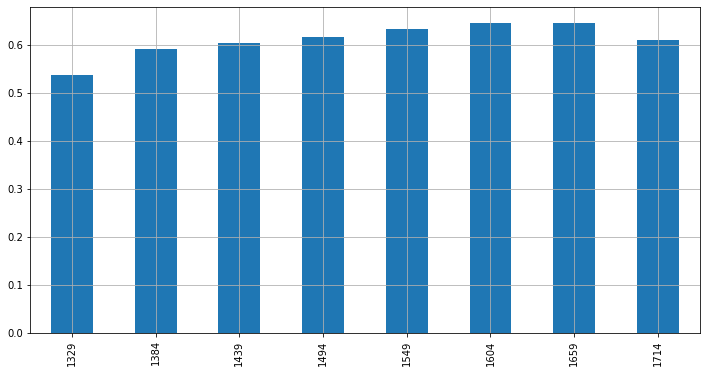

Nodes: (100, 25)
1326    0.585366
1381    0.597561
1436    0.628049
1491    0.628049
1546    0.640244
1601    0.640244
1656    0.640244
1711    0.615854
Name: mean_test_score, dtype: float64


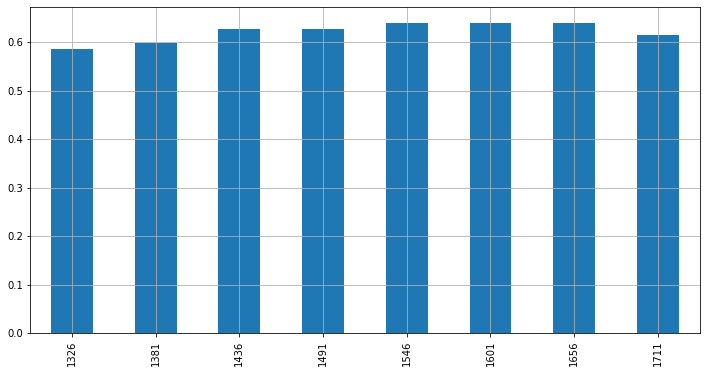

Nodes: (100, 50)
1327    0.560976
1382    0.573171
1437    0.603659
1492    0.646341
1547    0.640244
1602    0.652439
1657    0.640244
1712    0.621951
Name: mean_test_score, dtype: float64


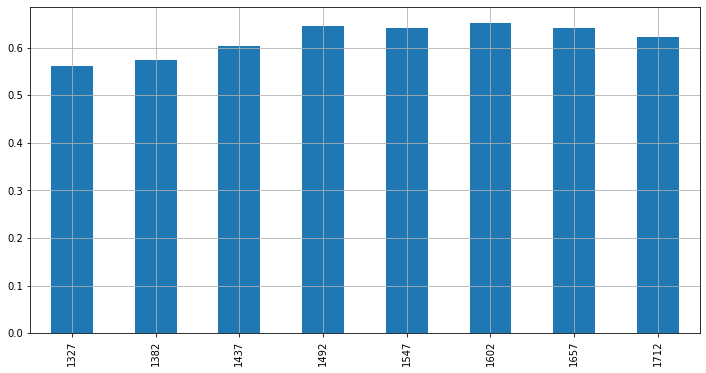

Nodes: (100, 75)
1328    0.548780
1383    0.567073
1438    0.591463
1493    0.597561
1548    0.609756
1603    0.640244
1658    0.646341
1713    0.615854
Name: mean_test_score, dtype: float64


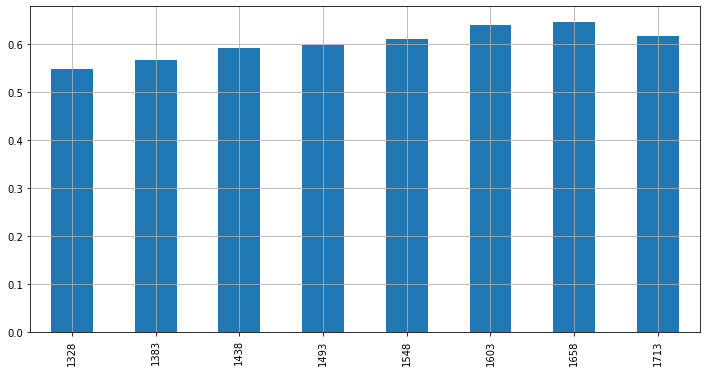

Nodes: (125, 100)
1333    0.548780
1388    0.597561
1443    0.634146
1498    0.628049
1553    0.640244
1608    0.634146
1663    0.628049
1718    0.615854
Name: mean_test_score, dtype: float64


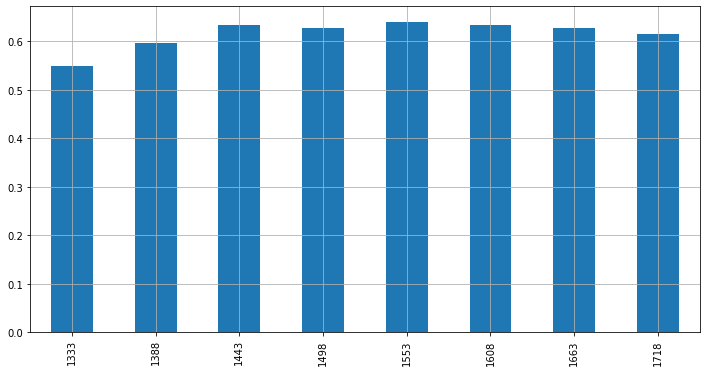

Nodes: (125, 125)
1334    0.500000
1389    0.567073
1444    0.621951
1499    0.621951
1554    0.640244
1609    0.652439
1664    0.652439
1719    0.621951
Name: mean_test_score, dtype: float64


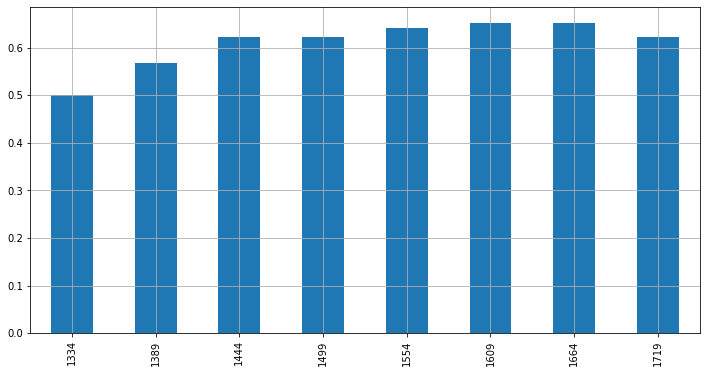

Nodes: (125, 25)
1330    0.518293
1385    0.603659
1440    0.628049
1495    0.634146
1550    0.646341
1605    0.664634
1660    0.646341
1715    0.615854
Name: mean_test_score, dtype: float64


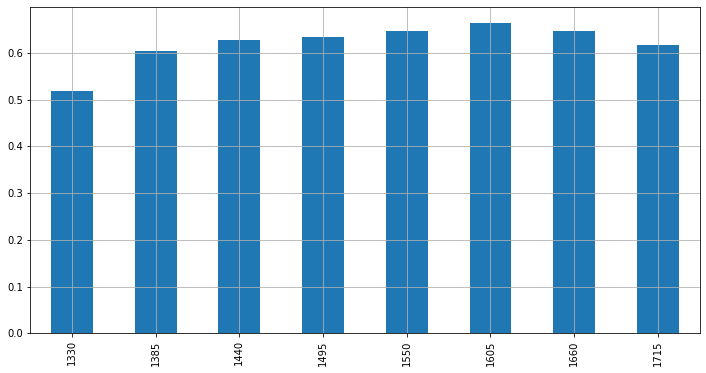

Nodes: (125, 50)
1331    0.536585
1386    0.585366
1441    0.603659
1496    0.603659
1551    0.609756
1606    0.646341
1661    0.646341
1716    0.621951
Name: mean_test_score, dtype: float64


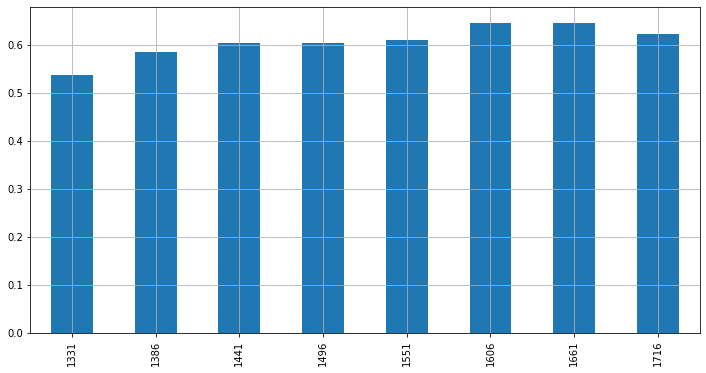

Nodes: (125, 75)
1332    0.506098
1387    0.591463
1442    0.603659
1497    0.621951
1552    0.634146
1607    0.664634
1662    0.652439
1717    0.615854
Name: mean_test_score, dtype: float64


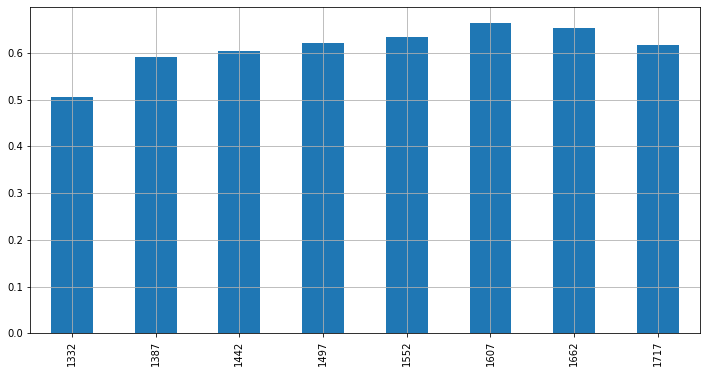

Nodes: (150, 100)
1338    0.542683
1393    0.585366
1448    0.597561
1503    0.609756
1558    0.621951
1613    0.640244
1668    0.640244
1723    0.615854
Name: mean_test_score, dtype: float64


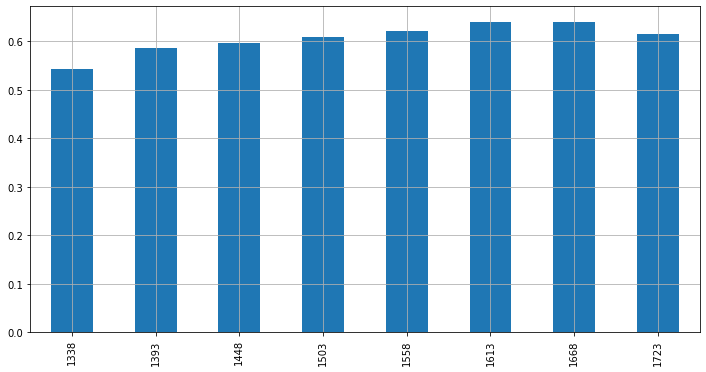

Nodes: (150, 125)
1339    0.536585
1394    0.560976
1449    0.585366
1504    0.609756
1559    0.621951
1614    0.652439
1669    0.664634
1724    0.628049
Name: mean_test_score, dtype: float64


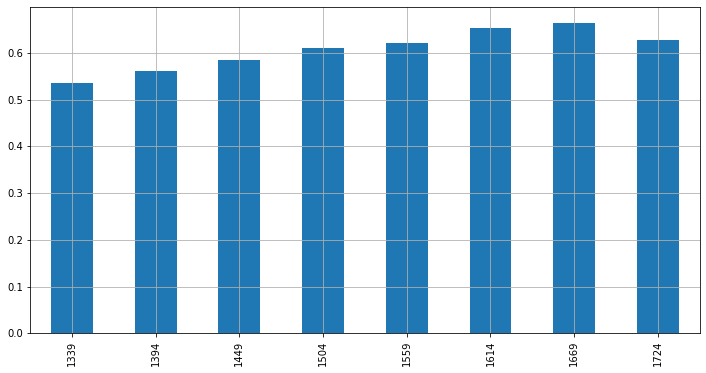

Nodes: (150, 150)
1340    0.554878
1395    0.567073
1450    0.603659
1505    0.640244
1560    0.646341
1615    0.640244
1670    0.640244
1725    0.603659
Name: mean_test_score, dtype: float64


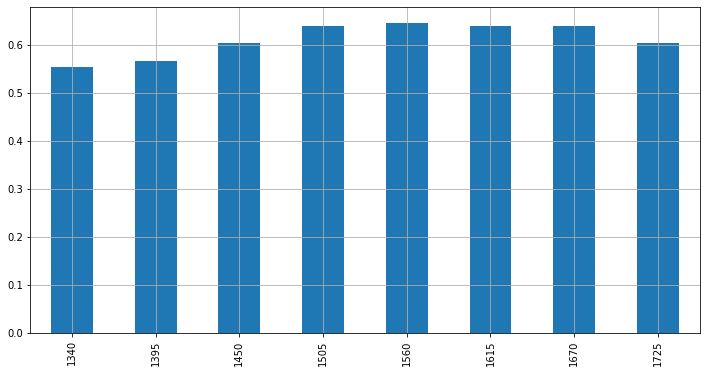

Nodes: (150, 25)
1335    0.567073
1390    0.628049
1445    0.646341
1500    0.658537
1555    0.670732
1610    0.640244
1665    0.628049
1720    0.615854
Name: mean_test_score, dtype: float64


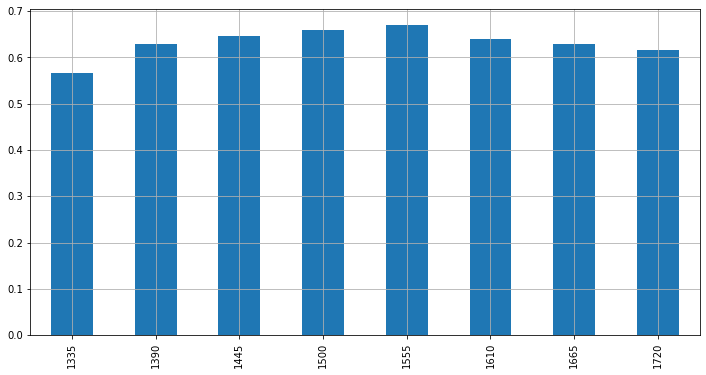

Nodes: (150, 50)
1336    0.567073
1391    0.621951
1446    0.652439
1501    0.646341
1556    0.646341
1611    0.646341
1666    0.628049
1721    0.609756
Name: mean_test_score, dtype: float64


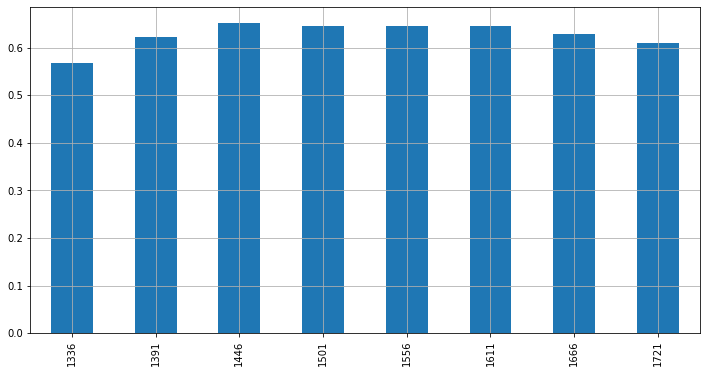

Nodes: (150, 75)
1337    0.518293
1392    0.573171
1447    0.609756
1502    0.609756
1557    0.621951
1612    0.621951
1667    0.628049
1722    0.609756
Name: mean_test_score, dtype: float64


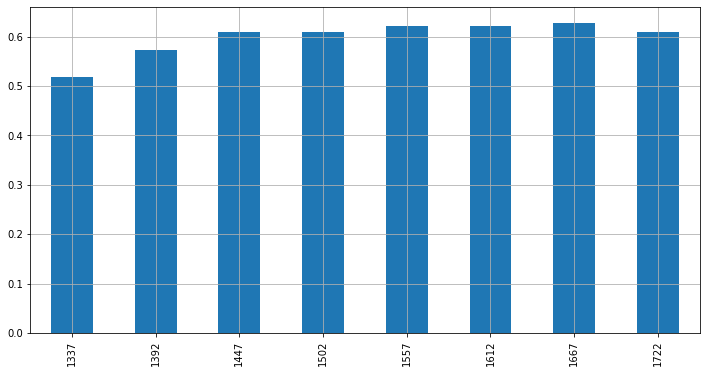

Nodes: (175, 100)
1344    0.542683
1399    0.621951
1454    0.634146
1509    0.652439
1564    0.652439
1619    0.640244
1674    0.634146
1729    0.621951
Name: mean_test_score, dtype: float64


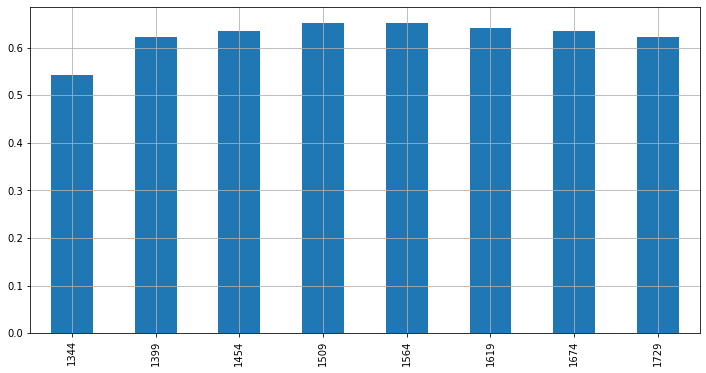

Nodes: (175, 125)
1345    0.560976
1400    0.573171
1455    0.603659
1510    0.609756
1565    0.628049
1620    0.628049
1675    0.634146
1730    0.615854
Name: mean_test_score, dtype: float64


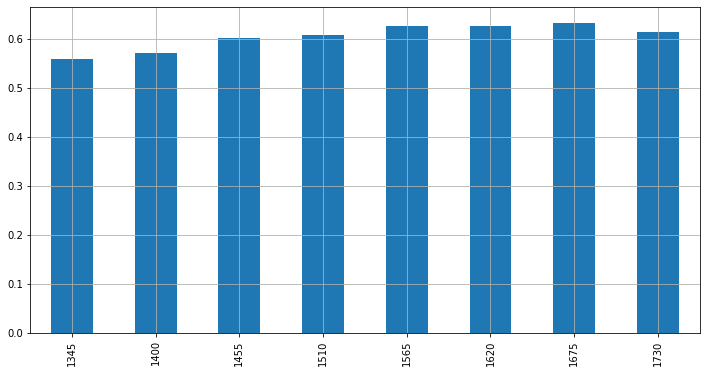

Nodes: (175, 150)
1346    0.512195
1401    0.591463
1456    0.603659
1511    0.621951
1566    0.609756
1621    0.628049
1676    0.646341
1731    0.621951
Name: mean_test_score, dtype: float64


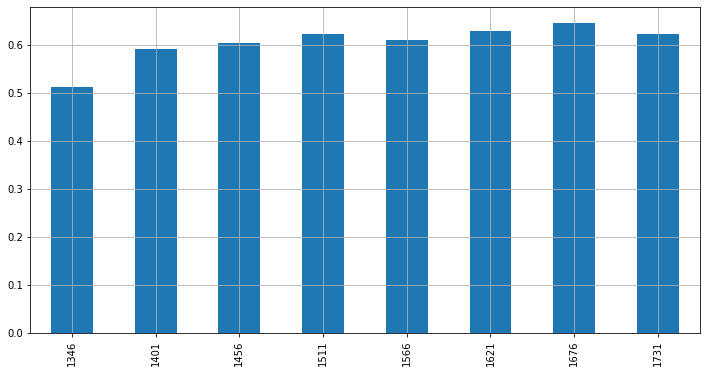

Nodes: (175, 175)
1347    0.524390
1402    0.628049
1457    0.658537
1512    0.664634
1567    0.664634
1622    0.658537
1677    0.640244
1732    0.603659
Name: mean_test_score, dtype: float64


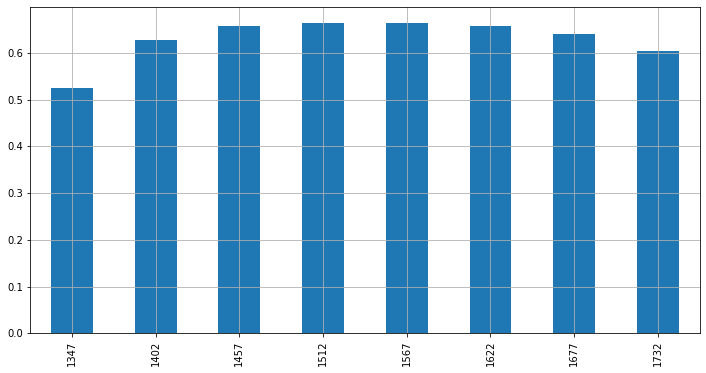

Nodes: (175, 25)
1341    0.548780
1396    0.591463
1451    0.609756
1506    0.609756
1561    0.628049
1616    0.634146
1671    0.628049
1726    0.615854
Name: mean_test_score, dtype: float64


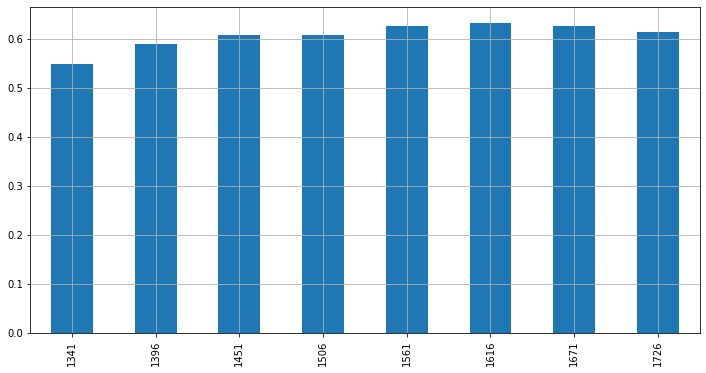

Nodes: (175, 50)
1342    0.536585
1397    0.579268
1452    0.615854
1507    0.615854
1562    0.621951
1617    0.652439
1672    0.652439
1727    0.621951
Name: mean_test_score, dtype: float64


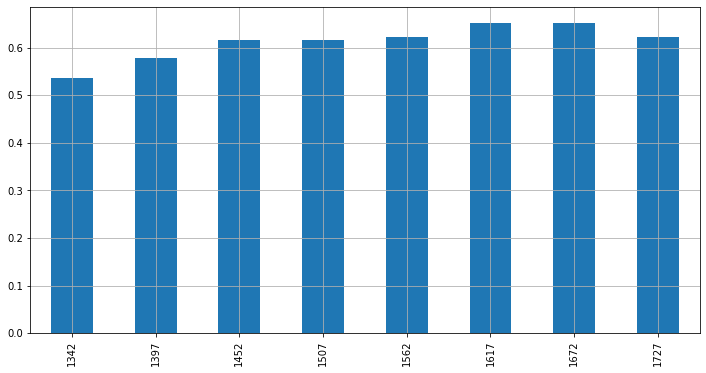

Nodes: (175, 75)
1343    0.530488
1398    0.579268
1453    0.615854
1508    0.628049
1563    0.640244
1618    0.646341
1673    0.640244
1728    0.615854
Name: mean_test_score, dtype: float64


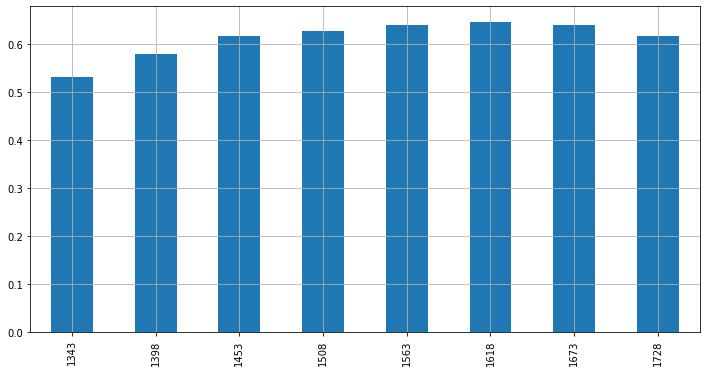

Nodes: (200, 100)
1351    0.542683
1406    0.603659
1461    0.609756
1516    0.628049
1571    0.634146
1626    0.634146
1681    0.621951
1736    0.621951
Name: mean_test_score, dtype: float64


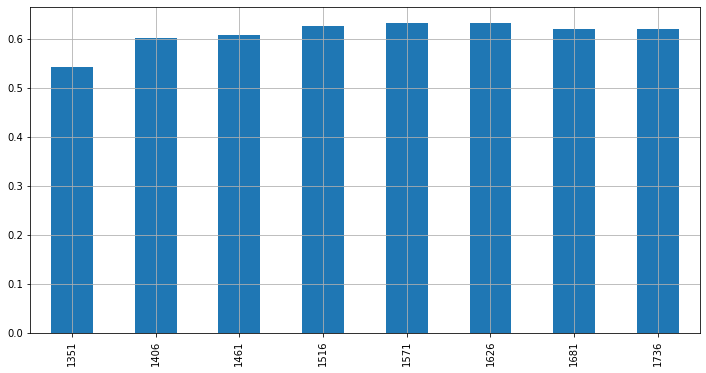

Nodes: (200, 125)
1352    0.530488
1407    0.585366
1462    0.621951
1517    0.640244
1572    0.658537
1627    0.652439
1682    0.664634
1737    0.621951
Name: mean_test_score, dtype: float64


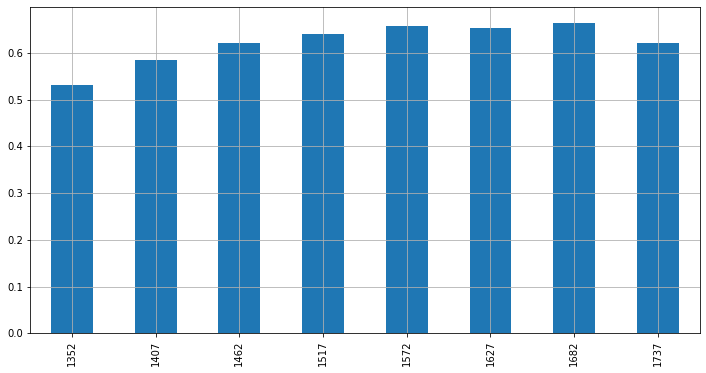

Nodes: (200, 150)
1353    0.518293
1408    0.567073
1463    0.597561
1518    0.621951
1573    0.621951
1628    0.628049
1683    0.628049
1738    0.609756
Name: mean_test_score, dtype: float64


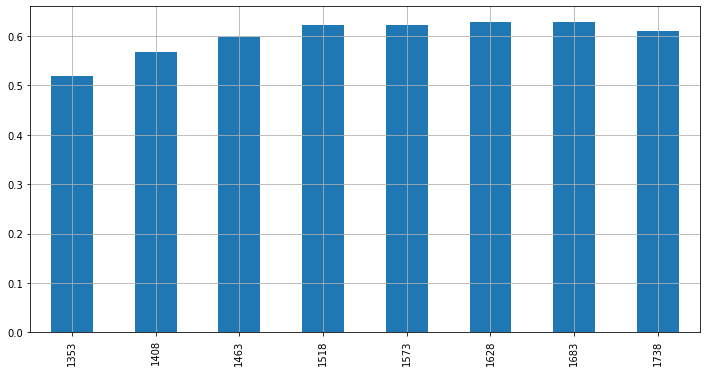

Nodes: (200, 175)
1354    0.554878
1409    0.573171
1464    0.628049
1519    0.621951
1574    0.640244
1629    0.634146
1684    0.628049
1739    0.609756
Name: mean_test_score, dtype: float64


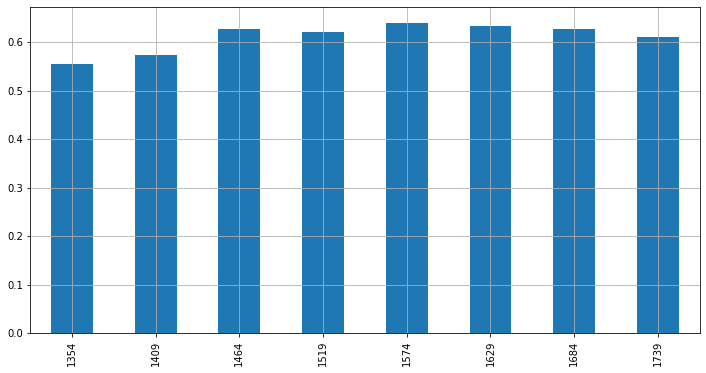

Nodes: (200, 200)
1355    0.554878
1410    0.597561
1465    0.646341
1520    0.670732
1575    0.670732
1630    0.670732
1685    0.664634
1740    0.615854
Name: mean_test_score, dtype: float64


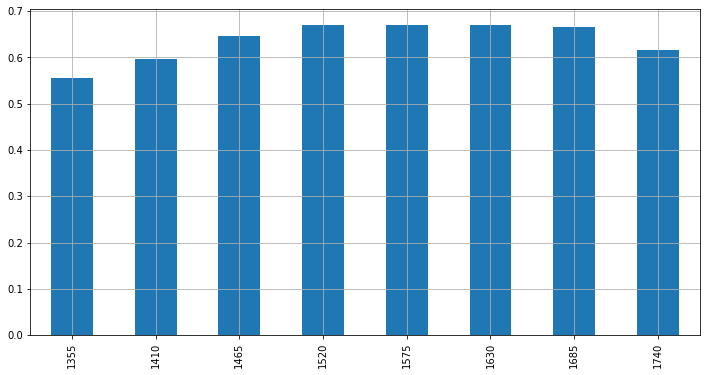

Nodes: (200, 25)
1348    0.548780
1403    0.609756
1458    0.670732
1513    0.664634
1568    0.640244
1623    0.640244
1678    0.634146
1733    0.609756
Name: mean_test_score, dtype: float64


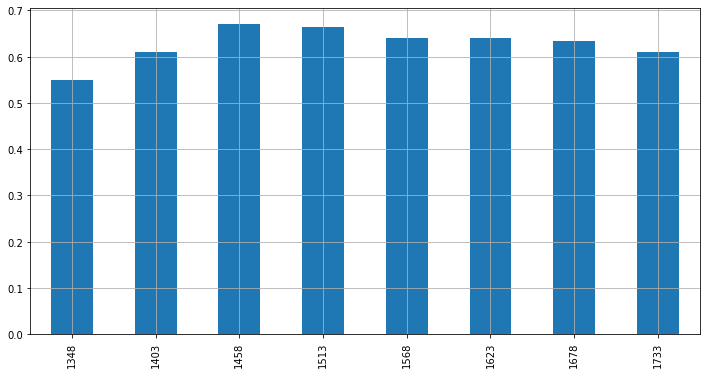

Nodes: (200, 50)
1349    0.567073
1404    0.579268
1459    0.621951
1514    0.621951
1569    0.628049
1624    0.646341
1679    0.646341
1734    0.621951
Name: mean_test_score, dtype: float64


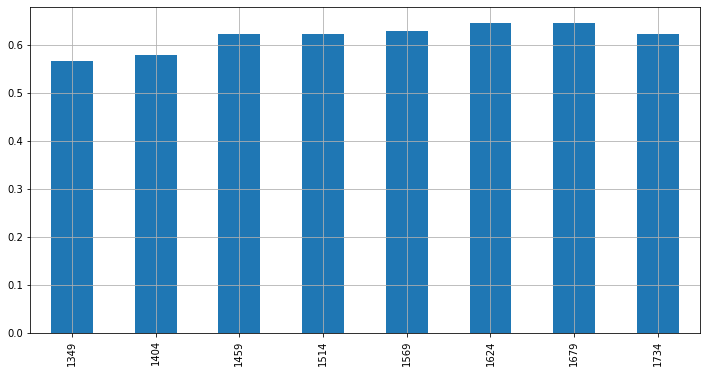

Nodes: (200, 75)
1350    0.567073
1405    0.579268
1460    0.585366
1515    0.609756
1570    0.615854
1625    0.640244
1680    0.634146
1735    0.609756
Name: mean_test_score, dtype: float64


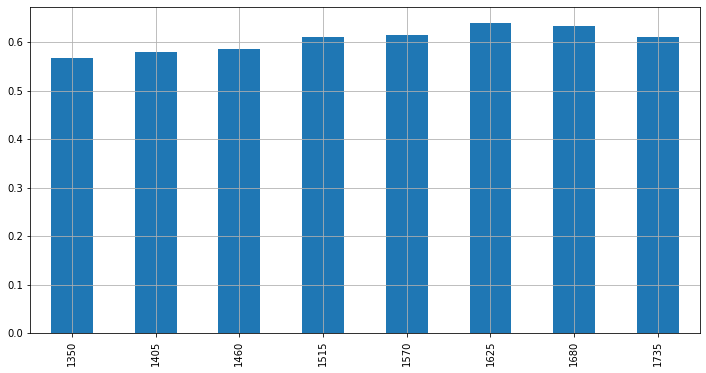

Nodes: (225, 100)
1359    0.554878
1414    0.585366
1469    0.609756
1524    0.621951
1579    0.628049
1634    0.640244
1689    0.652439
1744    0.609756
Name: mean_test_score, dtype: float64


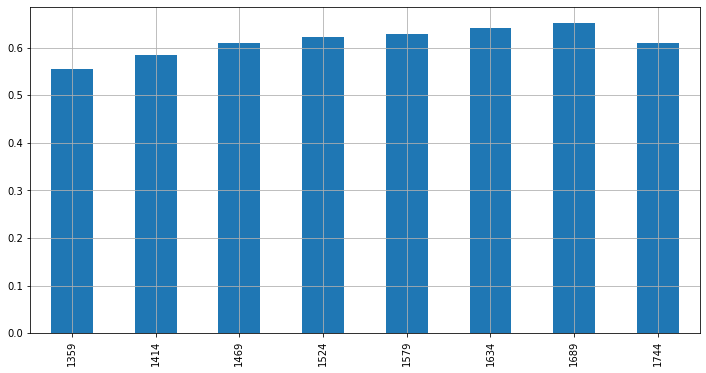

Nodes: (225, 125)
1360    0.585366
1415    0.640244
1470    0.603659
1525    0.603659
1580    0.640244
1635    0.652439
1690    0.646341
1745    0.621951
Name: mean_test_score, dtype: float64


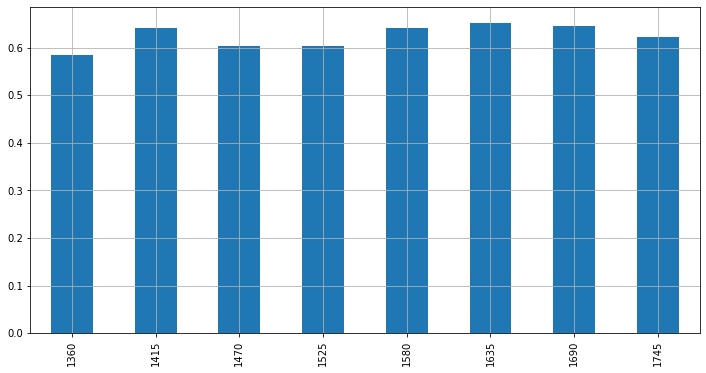

Nodes: (225, 150)
1361    0.579268
1416    0.603659
1471    0.615854
1526    0.615854
1581    0.658537
1636    0.658537
1691    0.646341
1746    0.615854
Name: mean_test_score, dtype: float64


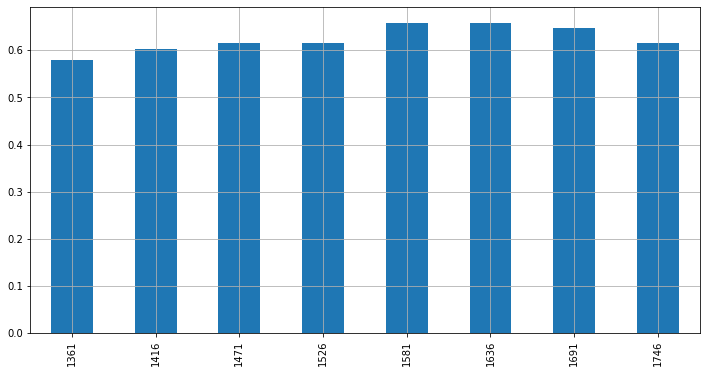

Nodes: (225, 175)
1362    0.542683
1417    0.579268
1472    0.609756
1527    0.621951
1582    0.628049
1637    0.640244
1692    0.646341
1747    0.615854
Name: mean_test_score, dtype: float64


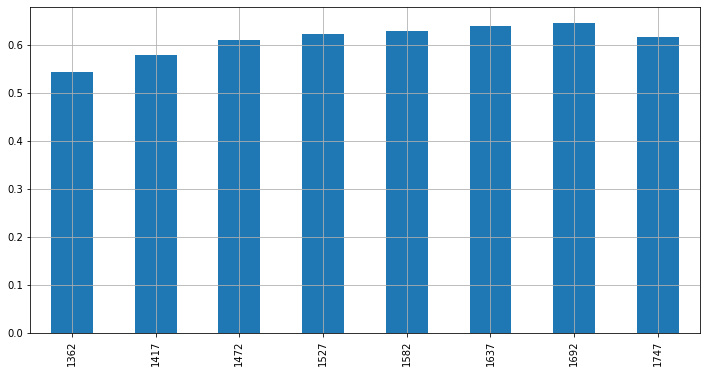

Nodes: (225, 200)
1363    0.548780
1418    0.579268
1473    0.628049
1528    0.621951
1583    0.634146
1638    0.652439
1693    0.646341
1748    0.615854
Name: mean_test_score, dtype: float64


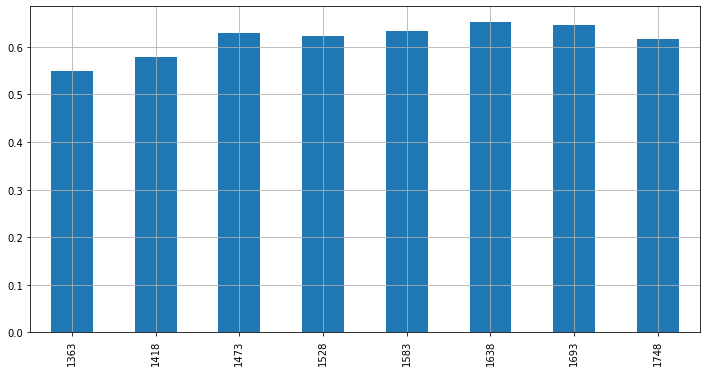

Nodes: (225, 225)
1364    0.548780
1419    0.621951
1474    0.640244
1529    0.658537
1584    0.664634
1639    0.658537
1694    0.652439
1749    0.615854
Name: mean_test_score, dtype: float64


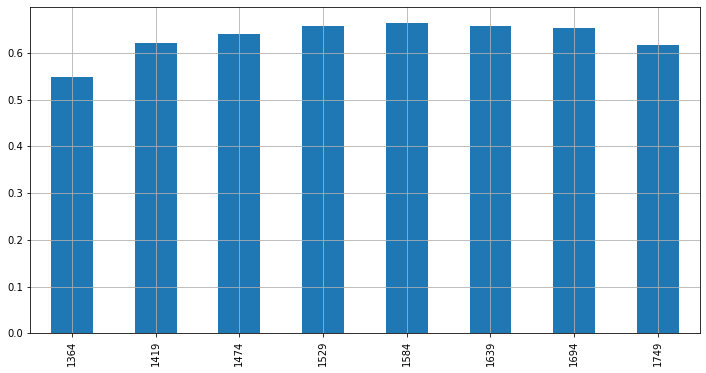

Nodes: (225, 25)
1356    0.573171
1411    0.579268
1466    0.597561
1521    0.615854
1576    0.615854
1631    0.615854
1686    0.615854
1741    0.597561
Name: mean_test_score, dtype: float64


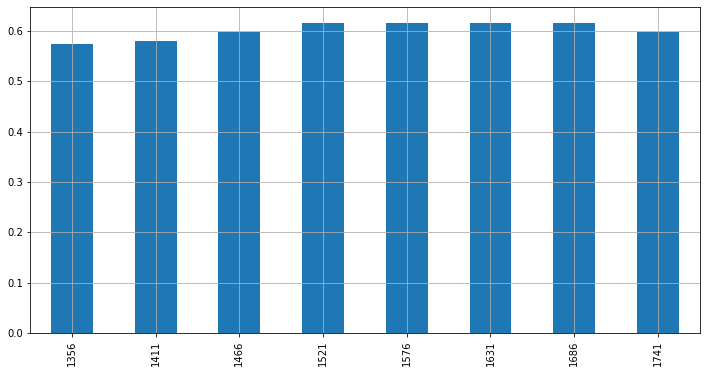

Nodes: (225, 50)
1357    0.567073
1412    0.609756
1467    0.628049
1522    0.628049
1577    0.640244
1632    0.628049
1687    0.615854
1742    0.609756
Name: mean_test_score, dtype: float64


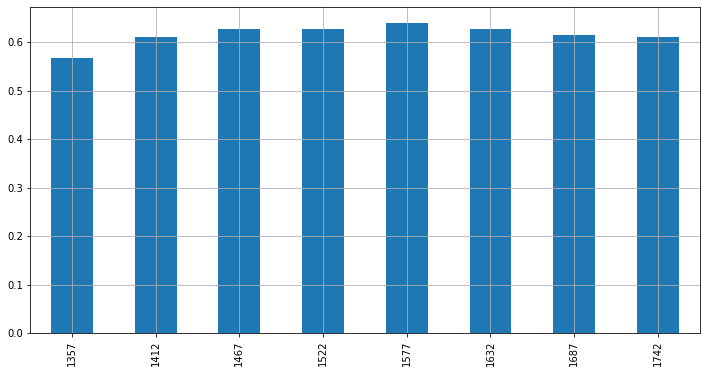

Nodes: (225, 75)
1358    0.548780
1413    0.585366
1468    0.634146
1523    0.628049
1578    0.646341
1633    0.634146
1688    0.640244
1743    0.615854
Name: mean_test_score, dtype: float64


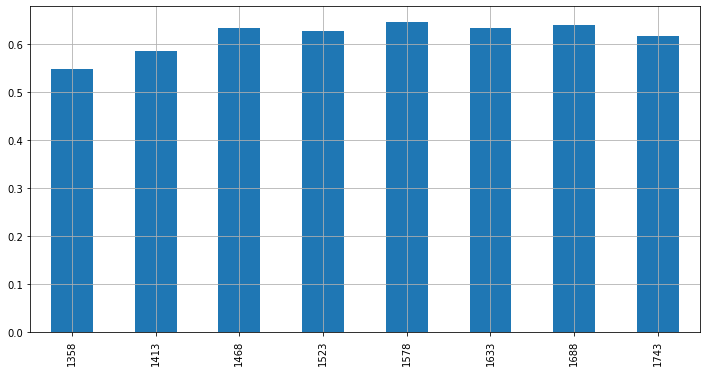

Nodes: (25, 25)
1320    0.548780
1375    0.591463
1430    0.609756
1485    0.615854
1540    0.615854
1595    0.628049
1650    0.628049
1705    0.609756
Name: mean_test_score, dtype: float64


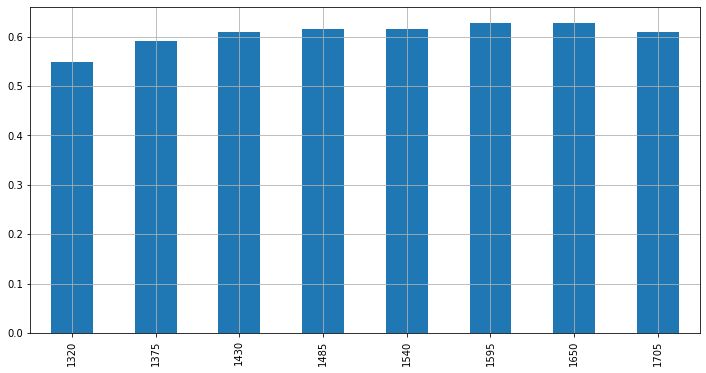

Nodes: (250, 100)
1368    0.548780
1423    0.542683
1478    0.609756
1533    0.634146
1588    0.640244
1643    0.634146
1698    0.640244
1753    0.609756
Name: mean_test_score, dtype: float64


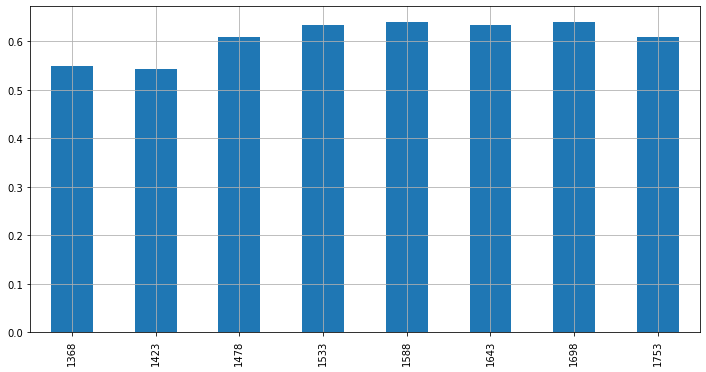

Nodes: (250, 125)
1369    0.548780
1424    0.609756
1479    0.621951
1534    0.640244
1589    0.640244
1644    0.634146
1699    0.640244
1754    0.615854
Name: mean_test_score, dtype: float64


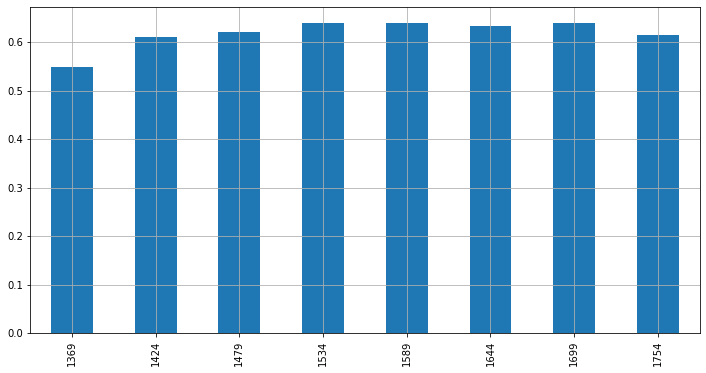

Nodes: (250, 150)
1370    0.573171
1425    0.628049
1480    0.634146
1535    0.652439
1590    0.658537
1645    0.652439
1700    0.652439
1755    0.609756
Name: mean_test_score, dtype: float64


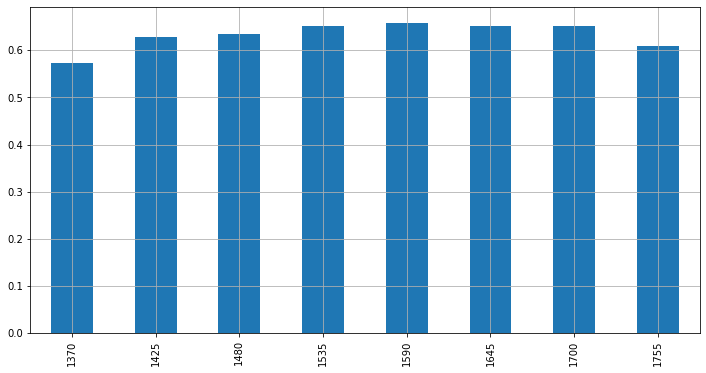

Nodes: (250, 175)
1371    0.585366
1426    0.621951
1481    0.646341
1536    0.658537
1591    0.664634
1646    0.652439
1701    0.640244
1756    0.609756
Name: mean_test_score, dtype: float64


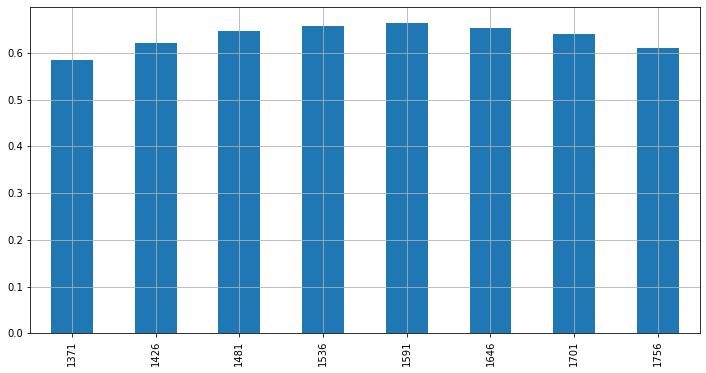

Nodes: (250, 200)
1372    0.560976
1427    0.597561
1482    0.615854
1537    0.615854
1592    0.646341
1647    0.664634
1702    0.652439
1757    0.615854
Name: mean_test_score, dtype: float64


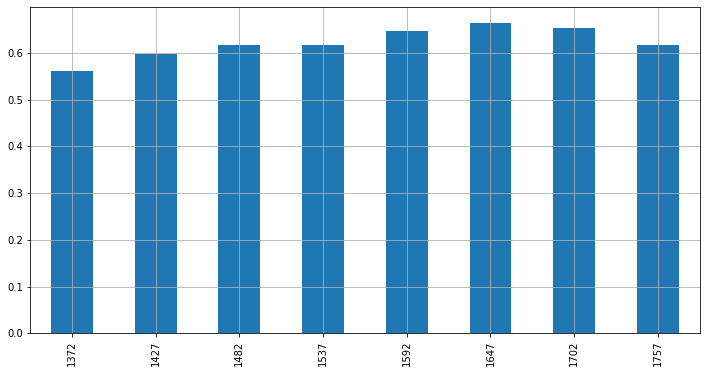

Nodes: (250, 225)
1373    0.573171
1428    0.609756
1483    0.628049
1538    0.634146
1593    0.646341
1648    0.634146
1703    0.640244
1758    0.603659
Name: mean_test_score, dtype: float64


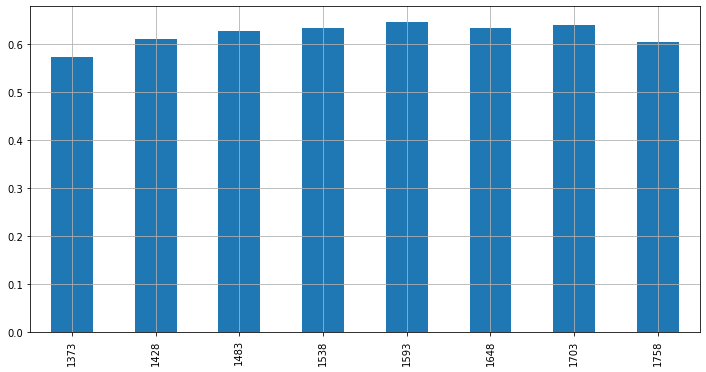

Nodes: (250, 25)
1365    0.567073
1420    0.603659
1475    0.615854
1530    0.615854
1585    0.628049
1640    0.646341
1695    0.634146
1750    0.621951
Name: mean_test_score, dtype: float64


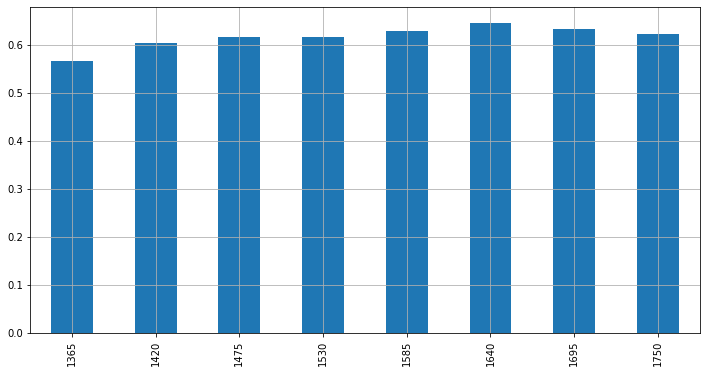

Nodes: (250, 250)
1374    0.548780
1429    0.579268
1484    0.603659
1539    0.609756
1594    0.628049
1649    0.634146
1704    0.615854
1759    0.615854
Name: mean_test_score, dtype: float64


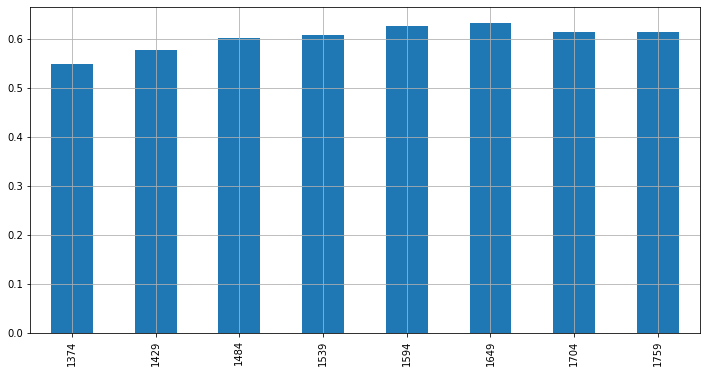

Nodes: (250, 50)
1366    0.554878
1421    0.609756
1476    0.609756
1531    0.640244
1586    0.621951
1641    0.634146
1696    0.628049
1751    0.609756
Name: mean_test_score, dtype: float64


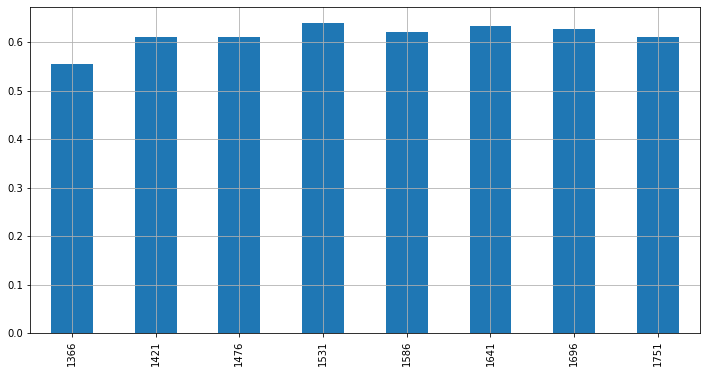

Nodes: (250, 75)
1367    0.573171
1422    0.628049
1477    0.628049
1532    0.640244
1587    0.615854
1642    0.628049
1697    0.634146
1752    0.615854
Name: mean_test_score, dtype: float64


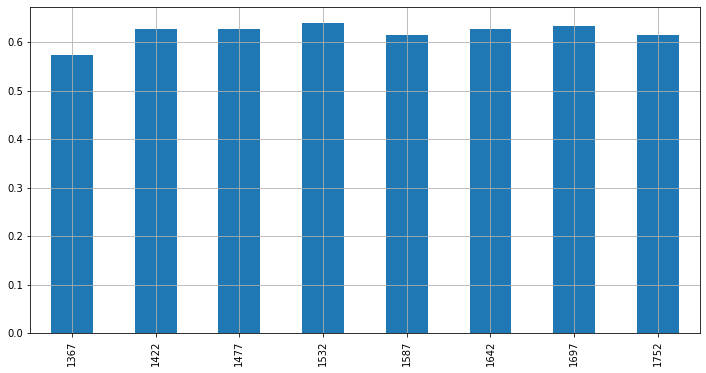

Nodes: (50, 25)
1321    0.560976
1376    0.591463
1431    0.609756
1486    0.652439
1541    0.646341
1596    0.652439
1651    0.658537
1706    0.621951
Name: mean_test_score, dtype: float64


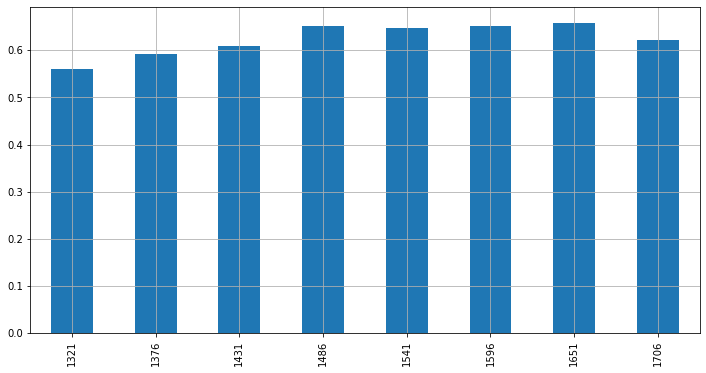

Nodes: (50, 50)
1322    0.573171
1377    0.615854
1432    0.597561
1487    0.615854
1542    0.628049
1597    0.640244
1652    0.658537
1707    0.615854
Name: mean_test_score, dtype: float64


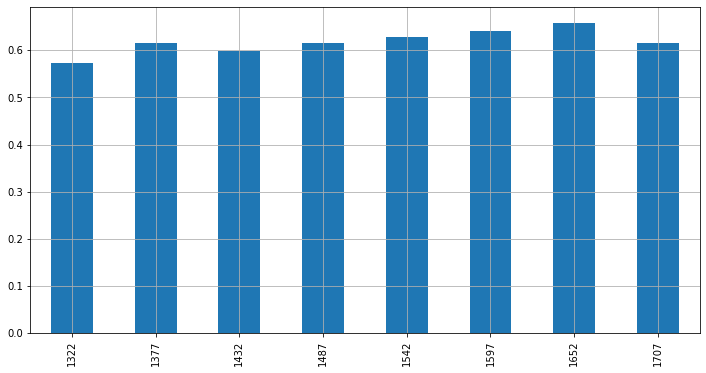

Nodes: (75, 25)
1323    0.567073
1378    0.597561
1433    0.634146
1488    0.652439
1543    0.658537
1598    0.640244
1653    0.640244
1708    0.615854
Name: mean_test_score, dtype: float64


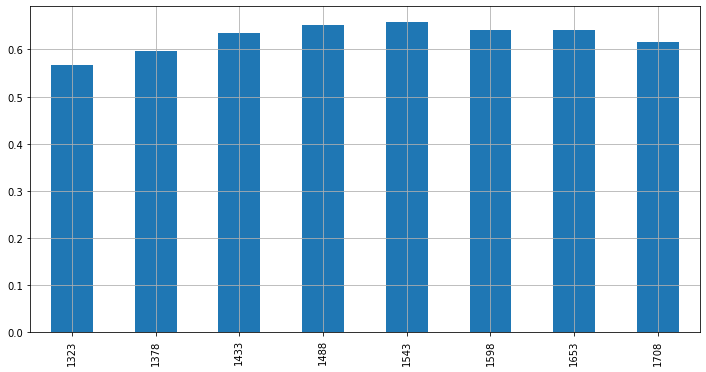

Nodes: (75, 50)
1324    0.573171
1379    0.585366
1434    0.603659
1489    0.621951
1544    0.634146
1599    0.634146
1654    0.628049
1709    0.615854
Name: mean_test_score, dtype: float64


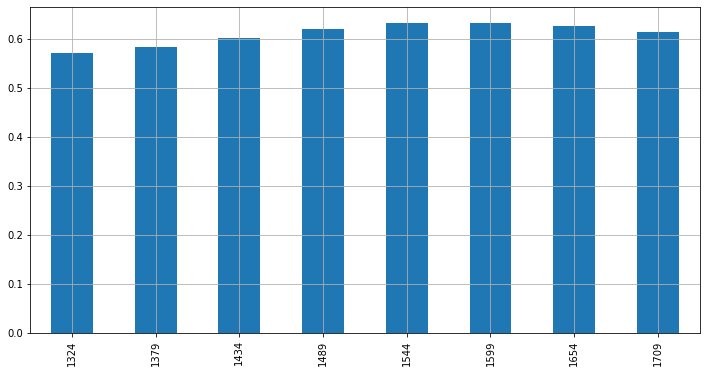

Nodes: (75, 75)
1325    0.548780
1380    0.591463
1435    0.579268
1490    0.609756
1545    0.621951
1600    0.640244
1655    0.646341
1710    0.621951
Name: mean_test_score, dtype: float64


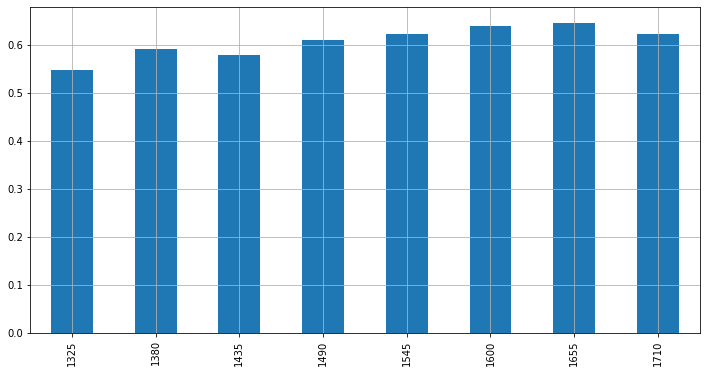

In [37]:
x = batches_df[1]

for n,_df in x.groupby(by="param_nodes"):
    print("Nodes:", n)
    print(_df.sort_values(by="param_epochs")["mean_test_score"])
    _df.sort_values(by="param_epochs")["mean_test_score"].plot(kind="bar", figsize=(12,6), grid=True)
    plt.show()

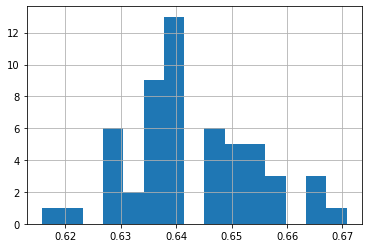

In [27]:
x[x["param_epochs"]==400]["mean_test_score"].hist(bins=15)

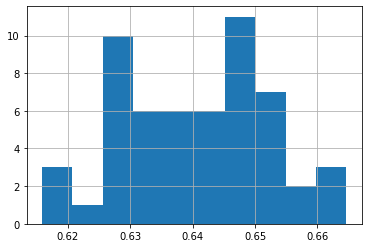

In [19]:
x[x["param_epochs"]==500]["mean_test_score"].hist()

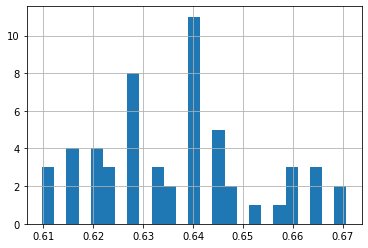

In [25]:
x[x["param_epochs"]==300]["mean_test_score"].hist(bins=25)

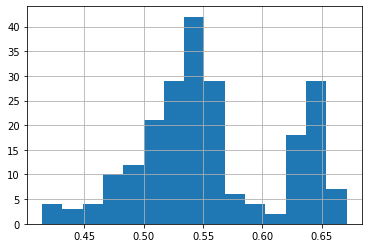

In [28]:
raw_data[raw_data["param_epochs"]==400]["mean_test_score"].hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18460eb8>,
      dtype=object)

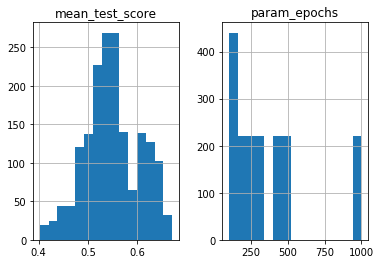

In [31]:
raw_data[["param_epochs","mean_test_score"]].hist(bins=15)

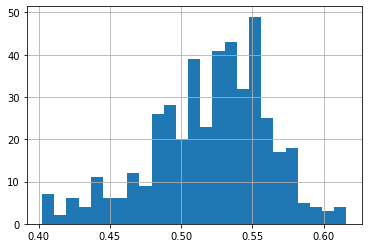

In [50]:
x = batches_df[20]

# for n,_df in x.groupby(by="param_nodes"):
#     print("Nodes:", n)
#     print(_df.sort_values(by="param_epochs")["mean_test_score"])
#     _df.sort_values(by="param_epochs")["mean_test_score"].plot(kind="bar", figsize=(12,6), grid=True)
#     plt.show()

x["mean_test_score"].hist(bins=25)

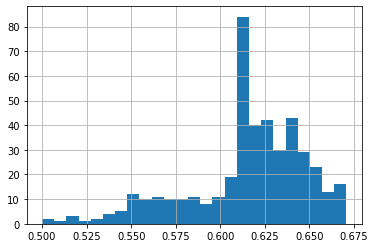

In [49]:
batches_df[1]["mean_test_score"].hist(bins=25)

batches_df[1]["mean_test_score"].hist(bins=25)